# EDA Pingüinos - Palmer

![img_title](data/penguins.png)

## Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Variables

In [34]:
alpha = 0.05

### Carga de datos

In [3]:
df = pd.read_csv('data/penguins_size.csv')

### Primera exploración de datos

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.shape

(344, 7)

In [9]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [10]:
for i in df.select_dtypes(include=object):
    print(f"La cardinalidad de la variable {i} es {df[i].nunique()/df.shape[0] * 100:.2f} %")

La cardinalidad de la variable species es 0.87 %
La cardinalidad de la variable island es 0.87 %
La cardinalidad de la variable sex es 0.87 %


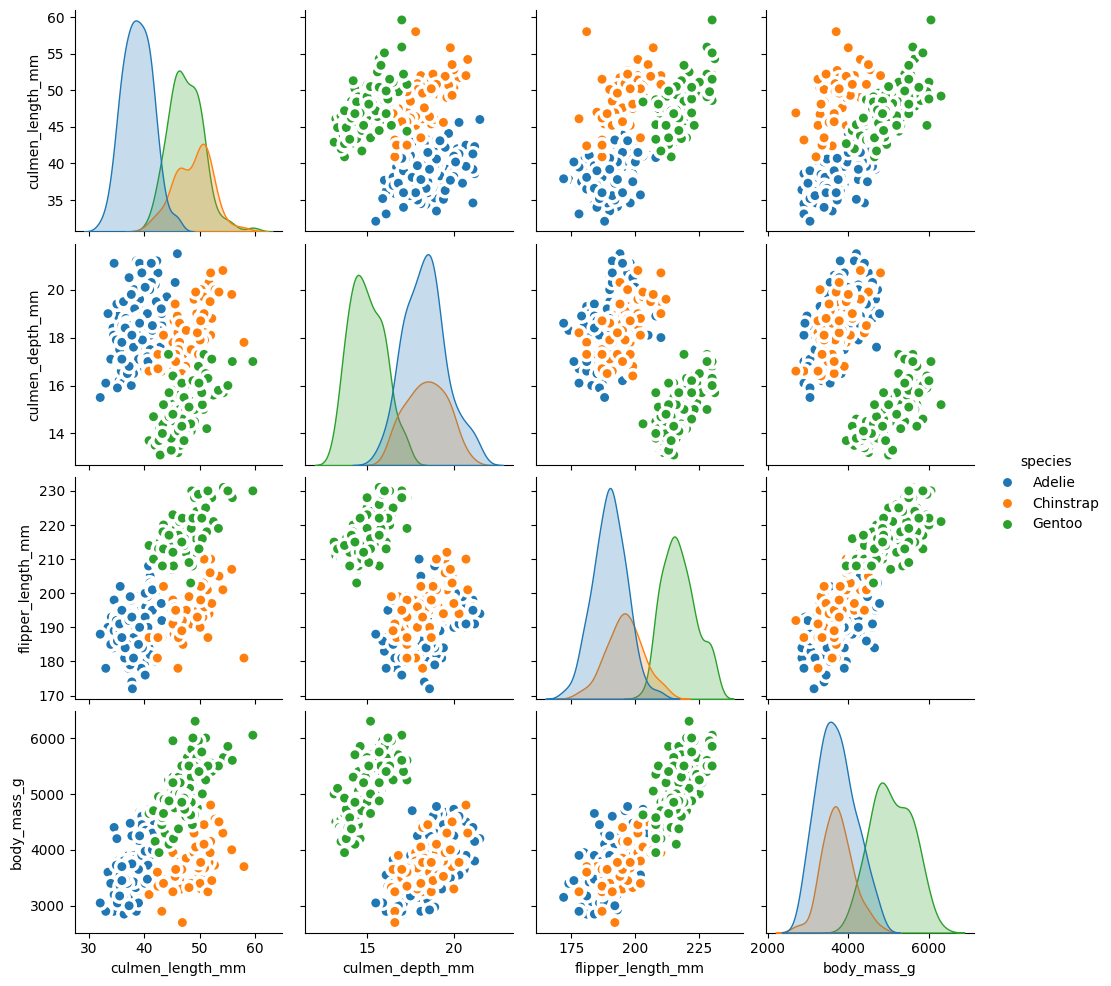

In [28]:
sns.pairplot(df, kind='scatter', hue='species',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5));

## Hipótesis

### Estadísticas

1. Tamaño y sexo
2. Especies y característica física
3. Aleta y la masa corporal
4. Distribución de normalidad

### Gráficamente

1. Distribución de las características por isla
2. Relación entre longitud y profundidad del pico
3. Interacción entre especies, islas y características físicas
4. Gráfico de normalidad

## Limpieza

In [12]:
# culmen_length_mm   342 non-null    float64
#  3   culmen_depth_mm    342 non-null    float64
#  4   flipper_length_mm  342 non-null    float64
#  5   body_mass_g        342 non-null    float64
#  6   sex                334 non-null    object 

df[(df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna()) | (df['sex'] == '.') | (df['culmen_length_mm'].isna())]

# Las filas que son todos nan, las eliminaria totalmente, después en las que el sexo es nan, me fijaría en el body mass y en base a eso le pondría que sexo puede ser

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [13]:
df['sex'].replace('.',np.nan,inplace=True)
df1 =df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [14]:
datos_imp = df.groupby(['species','sex','island'])[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'culmen_length_mm':'mean','culmen_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()
datos_imp

,species,sex,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,FEMALE,Biscoe,37.359091,17.704545,187.0,3375.0
1,Adelie,FEMALE,Dream,36.911111,17.618519,188.0,3400.0
2,Adelie,FEMALE,Torgersen,37.554167,17.550000,189.0,3400.0
3,Adelie,MALE,Biscoe,40.590909,19.036364,191.0,4000.0
4,Adelie,MALE,Dream,40.071429,18.839286,190.5,3987.5
5,Adelie,MALE,Torgersen,40.586957,19.391304,195.0,4000.0
6,Chinstrap,FEMALE,Dream,46.573529,17.588235,192.0,3550.0
7,Chinstrap,MALE,Dream,51.094118,19.252941,200.5,3950.0
8,Gentoo,FEMALE,Biscoe,45.563793,14.237931,212.0,4700.0
9,Gentoo,MALE,Biscoe,49.473770,15.718033,221.0,5500.0


In [15]:
from scipy.spatial.distance import euclidean

def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _, r_row in filas_relevantes.iterrows():
            distancia = euclidean(row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(0),
                                 r_row[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']
        
        return sex_a_imputar
    else:
        return row['sex']
    
df['sex'] = df.apply(impute_sex, axis=1)

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
df.loc[3, 'sex'] = np.nan
df.loc[339, 'sex'] = np.nan

df2 =df[(df['culmen_length_mm'].isna()) | (df['culmen_depth_mm'].isna()) | (df['flipper_length_mm'].isna()) | (df['body_mass_g'].isna()) | (df['sex'].isna())]
df2



,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_imp_2 = df.groupby(['species','island'])[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].aggregate(
    {'culmen_length_mm':'mean','culmen_depth_mm':'mean','flipper_length_mm':'median','body_mass_g':'median'}).reset_index()

merged_df = pd.merge(df2,df_imp_2,how='left',on=['species','island'])

merged_df = merged_df.assign(culmen_length_mm = lambda x: x['culmen_length_mm_x'].fillna(x['culmen_length_mm_y']),
                 culmen_depth_mm = lambda x: x['culmen_depth_mm_x'].fillna(x['culmen_depth_mm_y']),
                 flipper_length_mm = lambda x: x['flipper_length_mm_x'].fillna(x['flipper_length_mm_y']),
                 body_mass_g = lambda x: x['body_mass_g_x'].fillna(x['body_mass_g_y']))

merged_df = merged_df[df2.columns]
merged_df

merged_df.index = df2.index
merged_df

df.loc[3] = merged_df.loc[3]
df.loc[339] = merged_df.loc[339]

df

## Análisis

### Análisis univariante

In [ ]:
# Mostrar media moda y mediana de cada columna y la distribución

# Mostrar distribucion de cada especie

# Mostrar distribucion en cada isla

# Mostrar distribucion de sexo

# Mostrar en cada uno la desviación estandard y la varianza


In [27]:
for i in df:
    print(i)
    print('--'*50)
    print(df[i].describe())
    print('--'*50)

# Esto hay que hacerlo en gráficos para poder hacer una presentación

species
----------------------------------------------------------------------------------------------------
count        344
unique         3
top       Adelie
freq         152
Name: species, dtype: object
----------------------------------------------------------------------------------------------------
island
----------------------------------------------------------------------------------------------------
count        344
unique         3
top       Biscoe
freq         168
Name: island, dtype: object
----------------------------------------------------------------------------------------------------
culmen_length_mm
----------------------------------------------------------------------------------------------------
count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: culmen_length_mm, dtype: float64
-----------------------------------------------------------------------

## Análisis bivariante

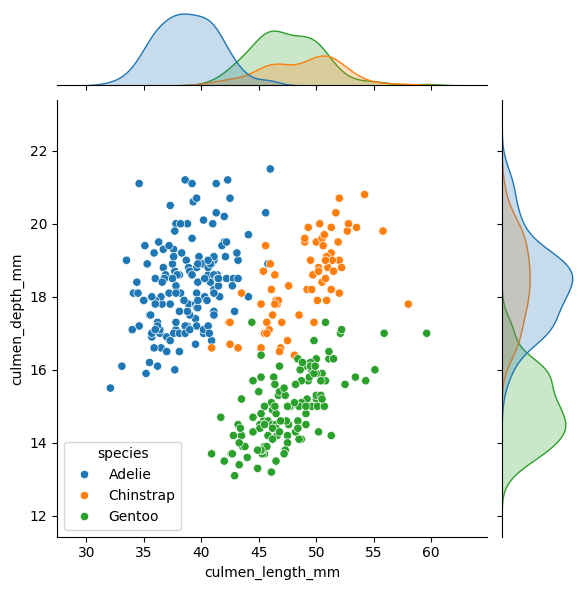

In [29]:
sns.jointplot(data=df, x = 'culmen_length_mm', y= 'culmen_depth_mm', hue='species')

### Multivariante

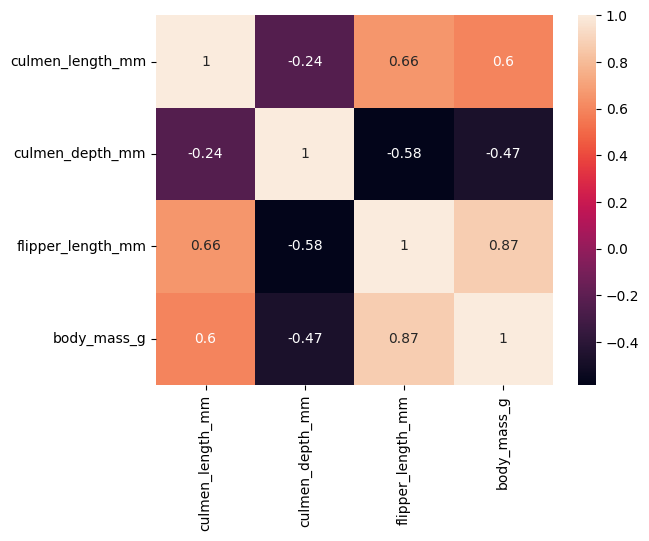

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## Hipótesis

1. Tamaño y sexo
2. Especies y característica física
3. Aleta y la masa corporal
4. Distribución de normalidad

**H0**: Planteamos hipotesis nulas.

**H1**: Planteamos hipotesis alternativa.

1. Tamaño vs Sexo ----> T de student.

**H0**: No hay evidencia significativa en la masa corporal entre sexos de los pingüinos.

**H1**: Existe una diferencia significativa entre el sexo y la masa corporal de los pingüinos.

2. Especies vs característica física ----> ANOVA.

**H0**: No hay evidencia significativa en la longitud del pico y la especie de los pingüinos.

**H1**: Existe una diferencia significativa entre la longitud del pico y la especie de los pingüinos.

3. Aleta vs la masa corporal ----> Correlación de Pearson.

**H0**: No hay evidencia significativa en el tamaño de la aleta y la masa corporal de los pingüinos.

**H1**: Existe una diferencia significativa en el tamaño de la aleta y la masa corporal de los pingüinos.

4. Normalidad ----> Shapiro-Wilks o D'Agostino's K-squared.

**H0**: La distribución de las columnas numericas sigue una distribución normal.

**H1**: La distribución de las comlumnas NO sigue una distribución normal.

In [37]:
# 1.

p_h = df[df['sex']=='MALE']['body_mass_g']
p_m = df[df['sex']=='FEMALE']['body_mass_g']

ttest = stats.ttest_ind(p_h, p_m)
ttest

if ttest[1] < alpha:
    print('Rechazamos hipotesis nula "No hay evidencia significativa en la masa corporal entre sexos de los pingüinos."')
else:
    print('No rechazamos hipotesis nula')

Rechazamos hipotesis nula "No hay evidencia significativa en la masa corporal entre sexos de los pingüinos."


In [45]:
# 2.

grupos_especies = df.groupby('species')['culmen_length_mm']
adelie = grupos_especies.get_group('Adelie')
chinstrap = grupos_especies.get_group('Chinstrap')
gentoo = grupos_especies.get_group('Gentoo')

anova = stats.f_oneway(adelie, chinstrap, gentoo)

if anova[1] < alpha:
    print('Rechazamos hipotesis nula "No hay evidencia significativa en la longitud del pico y las diferentes especies de los pingüinos."')
else:
    print('No rechazamos hipotesis nula')

Rechazamos hipotesis nula "No hay evidencia significativa en la longitud del pico y las diferentes especies de los pingüinos."


In [46]:
# 3.
aleta = df['flipper_length_mm']
body = df['body_mass_g']

correlacion, pv = stats.pearsonr(aleta, body)

if pv < alpha:
    print('Rechazamos hipotesis nula "No hay evidencia significativa en el tamaño de la aleta y la masa corporal de los pingüinos."')
else:
    print('No rechazamos hipotesis nula')

Rechazamos hipotesis nula "No hay evidencia significativa en la longitud del pico y las diferentes especies de los pingüinos."


In [48]:
variables_num = df.select_dtypes(exclude='object')

shapiro = {var: stats.shapiro(variables_num[var]) for var in variables_num.columns}

print(shapiro)

for var in variables_num.columns:
    if shapiro[var][1] < alpha:
        print('La distribución de las columnas numericas sigue una distribución normal."')
    else:
        print('No rechazamos hipotesis nula')

{'culmen_length_mm': ShapiroResult(statistic=0.9747693538665771, pvalue=1.0174228009418584e-05), 'culmen_depth_mm': ShapiroResult(statistic=0.9724009037017822, pvalue=3.856135208479827e-06), 'flipper_length_mm': ShapiroResult(statistic=0.9512673616409302, pvalue=3.0067661693777836e-09), 'body_mass_g': ShapiroResult(statistic=0.9593162536621094, pvalue=3.52559865746116e-08)}
La distribución de las columnas numericas sigue una distribución normal."
La distribución de las columnas numericas sigue una distribución normal."
La distribución de las columnas numericas sigue una distribución normal."
La distribución de las columnas numericas sigue una distribución normal."


1. Distribución de las características por isla
2. Relación entre longitud y profundidad del pico
3. Interacción entre especies, islas y características físicas
4. Gráfico de normalidad

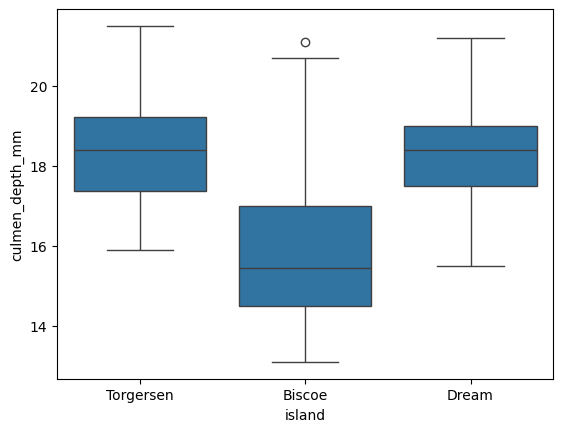

In [49]:
# 1.

sns.boxplot(x='island', y= 'culmen_depth_mm', data=df)
plt.show()